In [242]:
import numpy as np 
import sympy
import pandas as pd 
from sklearn import linear_model
import matplotlib.pyplot as plt 
import japanize_matplotlib

df = pd.read_excel("次元解析.xlsx", sheet_name=["水-空気", "四塩化炭素-空気", "四塩化炭素-水"],header=0)
df

{'水-空気':      水→空気   1回目     ÷50  ...  重力加速度g m/s^2  log(σ/D^2 ρg)^d  log(Δρ/ρ)
 0  0.0004  0.59  0.0118  ...           9.8              NaN        NaN
 1  0.0007  0.69  0.0138  ...           9.8              NaN        NaN
 2  0.0010  0.99  0.0198  ...           9.8              NaN        NaN
 
 [3 rows x 17 columns],
 '四塩化炭素-空気':    四塩化炭素→空気   1回目     ÷50  ...  重力加速度g m/s^2  log(σ/D^2 ρg)^d  log(Δρ/ρ)
 0   0.00040  0.20  0.0040  ...           9.8              NaN        NaN
 1   0.00070  0.16  0.0032  ...           9.8              NaN        NaN
 2   0.00105  0.17  0.0034  ...           9.8              NaN        NaN
 
 [3 rows x 16 columns],
 '四塩化炭素-水':    四塩化炭素→水  1回目    ÷50  ...  重力加速度g m/s^2  log(σ/D^2 ρg)^d  log(Δρ/ρ)
 0   0.0004  0.5  0.010  ...           9.8              NaN        NaN
 1   0.0007  0.7  0.014  ...           9.8              NaN        NaN
 2   0.0010  1.0  0.020  ...           9.8              NaN        NaN
 
 [3 rows x 16 columns]}

[[2.46042806]]
[[2.88144636]]
[[2.25730103]]


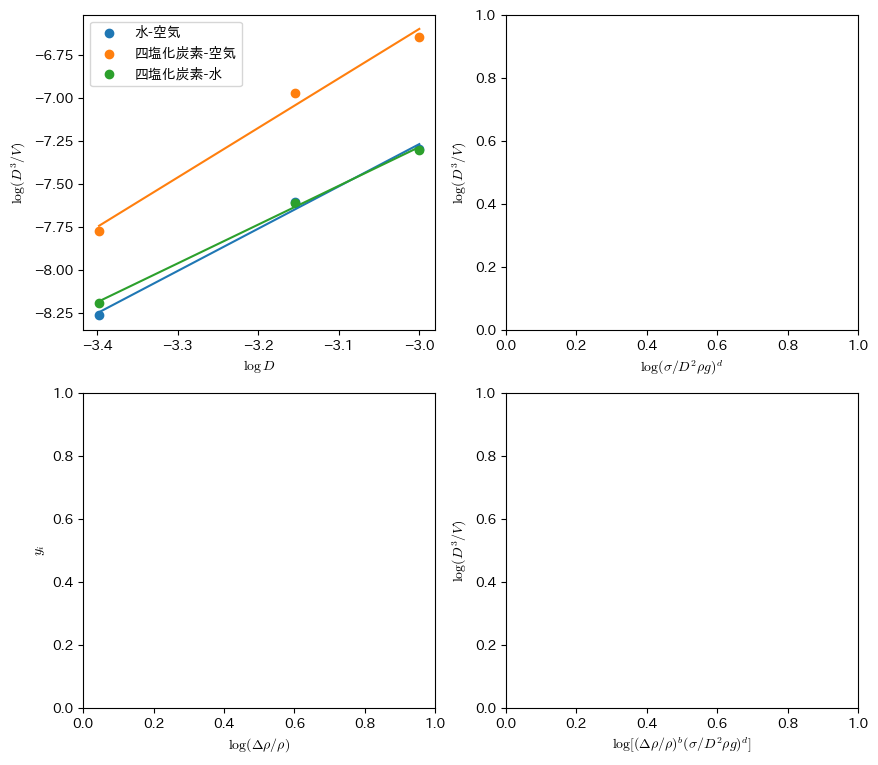

In [235]:
# wa: water-air, Ca: CCl4-air, Cw: CCl4-water

rho_w = 1.00
rho_c = 1.594
rho_a = 1.205e-3

g = 9.81

D = df['水-空気']['水→空気'].values
V = np.stack([df['水-空気']['1回目'].values/df['水-空気']['液滴数'].values, 
              df['四塩化炭素-空気']['1回目'].values/df['四塩化炭素-空気']['液滴数'].values,
              df['四塩化炭素-水']['1回目'].values/df['四塩化炭素-水']['液滴数'].values])
logD = np.log10(D)
logDV = np.log10(D**3/V)
models_0 = []
logDV_preds = []

for i in range(3):
    models_0.append(linear_model.LinearRegression().fit(logD.reshape(-1,1), logDV[i].reshape(-1,1)))
    logDV_preds.append(models_0[i].predict(logD.reshape(-1,1)))


fig, ax = plt.subplots(2,2, figsize=(10,9))
plt.rcParams['mathtext.fontset'] = 'cm'
labels = ["水-空気", "四塩化炭素-空気", "四塩化炭素-水"]
ax[0,0].set_xlabel(r"$\log D$")
ax[0,0].set_ylabel(r"$\log(D^3/V)$")
ax[0,1].set_xlabel(r"$\log(\sigma/D^2\rho g)^d$")
ax[0,1].set_ylabel(r"$\log(D^3/V)$")
ax[1,0].set_xlabel(r"$\log(\Delta\rho/\rho)$")
ax[1,0].set_ylabel(r"$y_i$")
ax[1,1].set_xlabel(r"$\log[(\Delta\rho/\rho)^b(\sigma/D^2\rho g)^d]$")
ax[1,1].set_ylabel(r"$\log(D^3/V)$")

for i in range(3):
    ax[0,0].scatter(logD, np.log10(D**3/V)[i], label=labels[i])
    ax[0,0].plot(logD, logDV_preds[i])

ax[0,0].legend()
plt.savefig("main.pdf")

for i in range(3):
    print(models_0[i].coef_)


In [236]:
logDV

array([[-8.26570203, -7.60458497, -7.29666519],
       [-7.77360362, -6.96985586, -6.64345268],
       [-8.19382003, -7.61083392, -7.30103   ]])

In [186]:
D

array([0.0004, 0.0007, 0.001 ])

## title

[[2.22851127]]
[[2.96147046]]
[[2.23400581]]


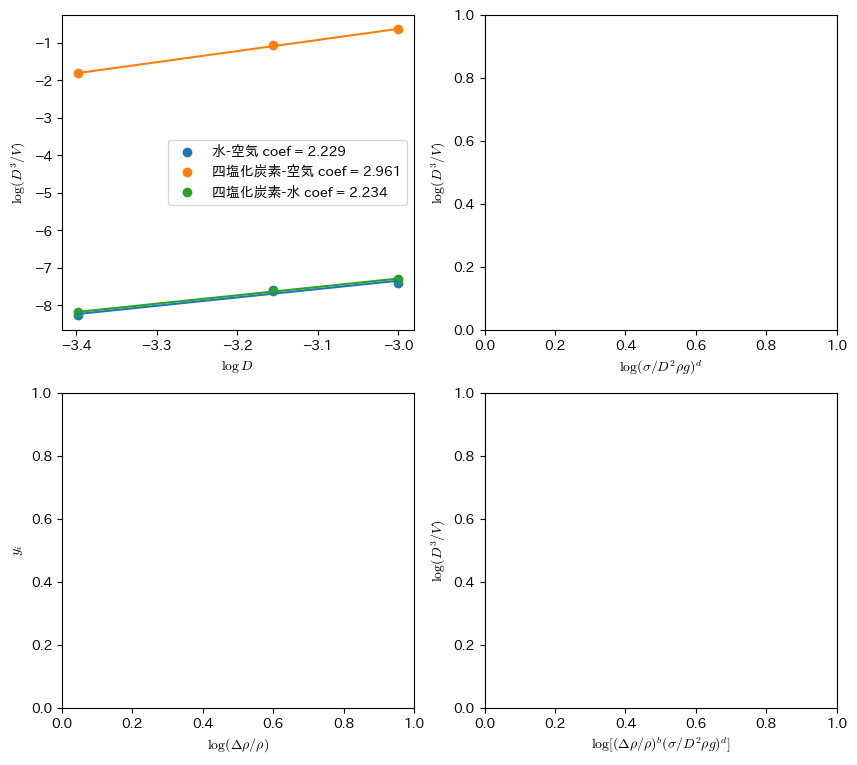

In [243]:
# wa: water-air, Ca: CCl4-air, Cw: CCl4-water

rho_w = 1.00
rho_c = 1.594
rho_a = 1.205e-3

g = 9.81

D = df['水-空気']['水→空気'].values
V = np.stack([df['水-空気']['2回目(未実施)'].values/df['水-空気']['液滴数'].values, 
              df['四塩化炭素-空気']['2回目(未実施)'].values/df['四塩化炭素-空気']['液滴数'].values,
              df['四塩化炭素-水']['2回目(未実施)'].values/df['四塩化炭素-水']['液滴数'].values])
logD = np.log10(D)
logDV = np.log10(D**3/V)
models_0 = []
logDV_preds = []

for i in range(3):
    models_0.append(linear_model.LinearRegression().fit(logD.reshape(-1,1), logDV[i].reshape(-1,1)))
    logDV_preds.append(models_0[i].predict(logD.reshape(-1,1)))


fig, ax = plt.subplots(2,2, figsize=(10,9))
plt.rcParams['mathtext.fontset'] = 'cm'
labels = [f"水-空気 coef = {models_0[0].coef_.item():.3f}", 
          f"四塩化炭素-空気 coef = {models_0[1].coef_.item():.3f}", 
          f"四塩化炭素-水 coef = {models_0[2].coef_.item():.3f}"]
ax[0,0].set_xlabel(r"$\log D$")
ax[0,0].set_ylabel(r"$\log(D^3/V)$")
ax[0,1].set_xlabel(r"$\log(\sigma/D^2\rho g)^d$")
ax[0,1].set_ylabel(r"$\log(D^3/V)$")
ax[1,0].set_xlabel(r"$\log(\Delta\rho/\rho)$")
ax[1,0].set_ylabel(r"$y_i$")
ax[1,1].set_xlabel(r"$\log[(\Delta\rho/\rho)^b(\sigma/D^2\rho g)^d]$")
ax[1,1].set_ylabel(r"$\log(D^3/V)$")

for i in range(3):
    ax[0,0].scatter(logD, logDV[i], label=labels[i])
    ax[0,0].plot(logD, logDV_preds[i])

ax[0,0].legend()
plt.savefig("main.pdf")

for i in range(3):
    print(models_0[i].coef_)


In [221]:
logD,logDV[0]

(array([-3.39794001, -3.15490196, -3.        ]),
 array([-8.36991129, -7.60458497, -7.39794001]))

In [217]:
df['水-空気']['2回目(未実施)'].values

array([0.75, 0.69, 1.25])

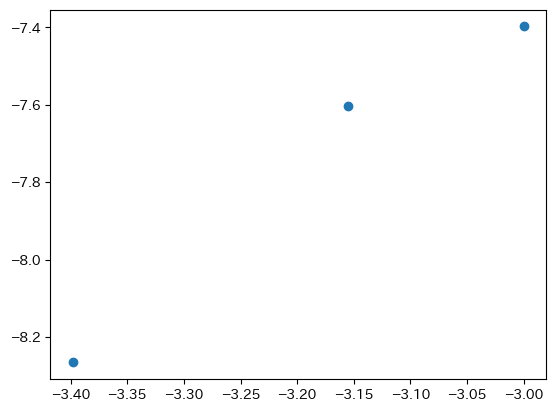

In [231]:
plt.scatter(logD, logDV[0])

In [230]:
V

array([[0.0118, 0.0138, 0.025 ],
       [0.0042, 0.0032, 0.0044],
       [0.0098, 0.014 , 0.02  ]])